In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd

df_actors = pd.read_csv('../Datasets/IMDB/actorfilms.csv', low_memory=False)
# Filter to keep only films from 1990 or before
df_actors = df_actors[df_actors['Year'] >= 1990]

In [3]:
df_actors

,Actor,ActorID,Film,Year,Votes,Rating,FilmID
39,Lauren Bacall,nm0000002,Ernest & Celestine,2012,18793,7.9,tt1816518
40,Lauren Bacall,nm0000002,The Forger,2012,4472,5.4,tt1368858
41,Lauren Bacall,nm0000002,All at Sea,2010,110,5.7,tt0858500
42,Lauren Bacall,nm0000002,The Walker,2007,5256,5.8,tt0783608
43,Lauren Bacall,nm0000002,Manderlay,2005,22622,7.3,tt0342735
...,...,...,...,...,...,...,...
191868,Roman Griffin Davis,nm9877392,Jojo Rabbit,2019,310904,7.9,tt2584384
191869,Lexi Rabe,nm9962642,Silk Road,2021,2050,5.9,tt7937254
191870,Lexi Rabe,nm9962642,Avengers: Endgame,2019,849079,8.4,tt4154796
191871,Lexi Rabe,nm9962642,Godzilla: King of the Monsters,2019,146737,6.0,tt3741700


In [4]:
df_movie_directors = pd.read_csv('../Datasets/IMDB/title.crew.tsv', sep='\t', low_memory=False)
df_movie_directors

,tconst,directors,writers
0,tt0000001,nm0005690,\N
1,tt0000002,nm0721526,\N
2,tt0000003,nm0721526,nm0721526
3,tt0000004,nm0721526,\N
4,tt0000005,nm0005690,\N
...,...,...,...
12048914,tt9916848,nm1485677,"nm9187127,nm1485677,nm9826385,nm9299459,nm1628284"
12048915,tt9916850,nm1485677,"nm9187127,nm1485677,nm9826385,nm1628284"
12048916,tt9916852,nm1485677,"nm9187127,nm1485677,nm9826385,nm9299459,nm1628284"
12048917,tt9916856,nm10538645,nm6951431


In [5]:
df_name_to_id = pd.read_csv('../Datasets/IMDB/name.basics.tsv', sep='\t', low_memory=False)

In [6]:
import pandas as pd

# Pre-compute lookups to avoid repeated DataFrame operations
movie_directors_dict = df_movie_directors.set_index('tconst')['directors'].to_dict()
name_lookup = df_name_to_id.set_index('nconst')['primaryName'].to_dict()

In [7]:
from Director_Director_Graph.director_graph_functions import build_actor_director_dict

# Create a dictionary mapping each actor to their ordered list of directors
actor_directors_dict = build_actor_director_dict(df_actors, movie_directors_dict, name_lookup)

for actor in list(actor_directors_dict.keys())[:5]:
    directors = actor_directors_dict[actor]
    print(f"\n{actor}: worked with {len(directors)} director(s)")
    for d in directors[:3]:  # Show first 3
        print(f"  - {d['director']} on '{d['film']}' ({d['year']})")
    if len(directors) > 3:
        print(f"  ... and {len(directors) - 3} more")


Lauren Bacall: worked with 23 director(s)
  - Rob Reiner on 'Misery' (1990)
  - Robert Lieberman on 'All I Want for Christmas' (1991)
  - Jim Kaufman on 'A Star for Two' (1991)
  ... and 20 more

Marlon Brando: worked with 8 director(s)
  - Andrew Bergman on 'The Freshman' (1990)
  - John Glen on 'Christopher Columbus: The Discovery' (1992)
  - Jeremy Leven on 'Don Juan DeMarco' (1994)
  ... and 5 more

Kirk Douglas: worked with 5 director(s)
  - John Landis on 'Oscar' (1991)
  - Jonathan Lynn on 'Greedy' (1994)
  - John Asher on 'Diamonds' (1999)
  ... and 2 more

John Gielgud: worked with 13 director(s)
  - James Scott on 'Strike It Rich' (1990)
  - Peter Greenaway on 'Prospero's Books' (1991)
  - John G. Avildsen on 'The Power of One' (1992)
  ... and 10 more

Alec Guinness: worked with 2 director(s)
  - Steven Soderbergh on 'Kafka' (1991)
  - Anthony Waller on 'Mute Witness' (1995)


In [20]:
# Extract all unique directors from actor_directors_dict
all_directors = set()

for actor, directors_list in actor_directors_dict.items():
    # Each item in directors_list is a dict with 'director', 'year', 'film'
    for d in directors_list:
        all_directors.add(d['director'])


In [9]:
from Director_Director_Graph.director_graph_functions import make_director_graph

director_graph = make_director_graph(all_directors, actor_directors_dict )


# Show top 10 most common transitions
print(f"\nTop 10 most common director transitions:")
edges_sorted = sorted(director_graph.edges(data=True), key=lambda x: x[2]['weight'], reverse=True)
for i, (from_dir, to_dir, data) in enumerate(edges_sorted[:10], 1):
    print(f"  {i:2d}. {from_dir} → {to_dir} (weight: {data['weight']})")


Top 10 most common director transitions:
   1. Anthony Russo → Joe Russo (weight: 207)
   2. Bobby Farrelly → Peter Farrelly (weight: 149)
   3. Ethan Coen → Joel Coen (weight: 135)
   4. Lana Wachowski → Lilly Wachowski (weight: 92)
   5. Joel Coen → Ethan Coen (weight: 88)
   6. Phil Lord → Christopher Miller (weight: 80)
   7. Ron Clements → John Musker (weight: 61)
   8. Shari Springer Berman → Robert Pulcini (weight: 56)
   9. Jason Friedberg → Aaron Seltzer (weight: 56)
  10. Mark Neveldine → Brian Taylor (weight: 54)


Filtered graph for visualization:
  Nodes: 78
  Edges: 128


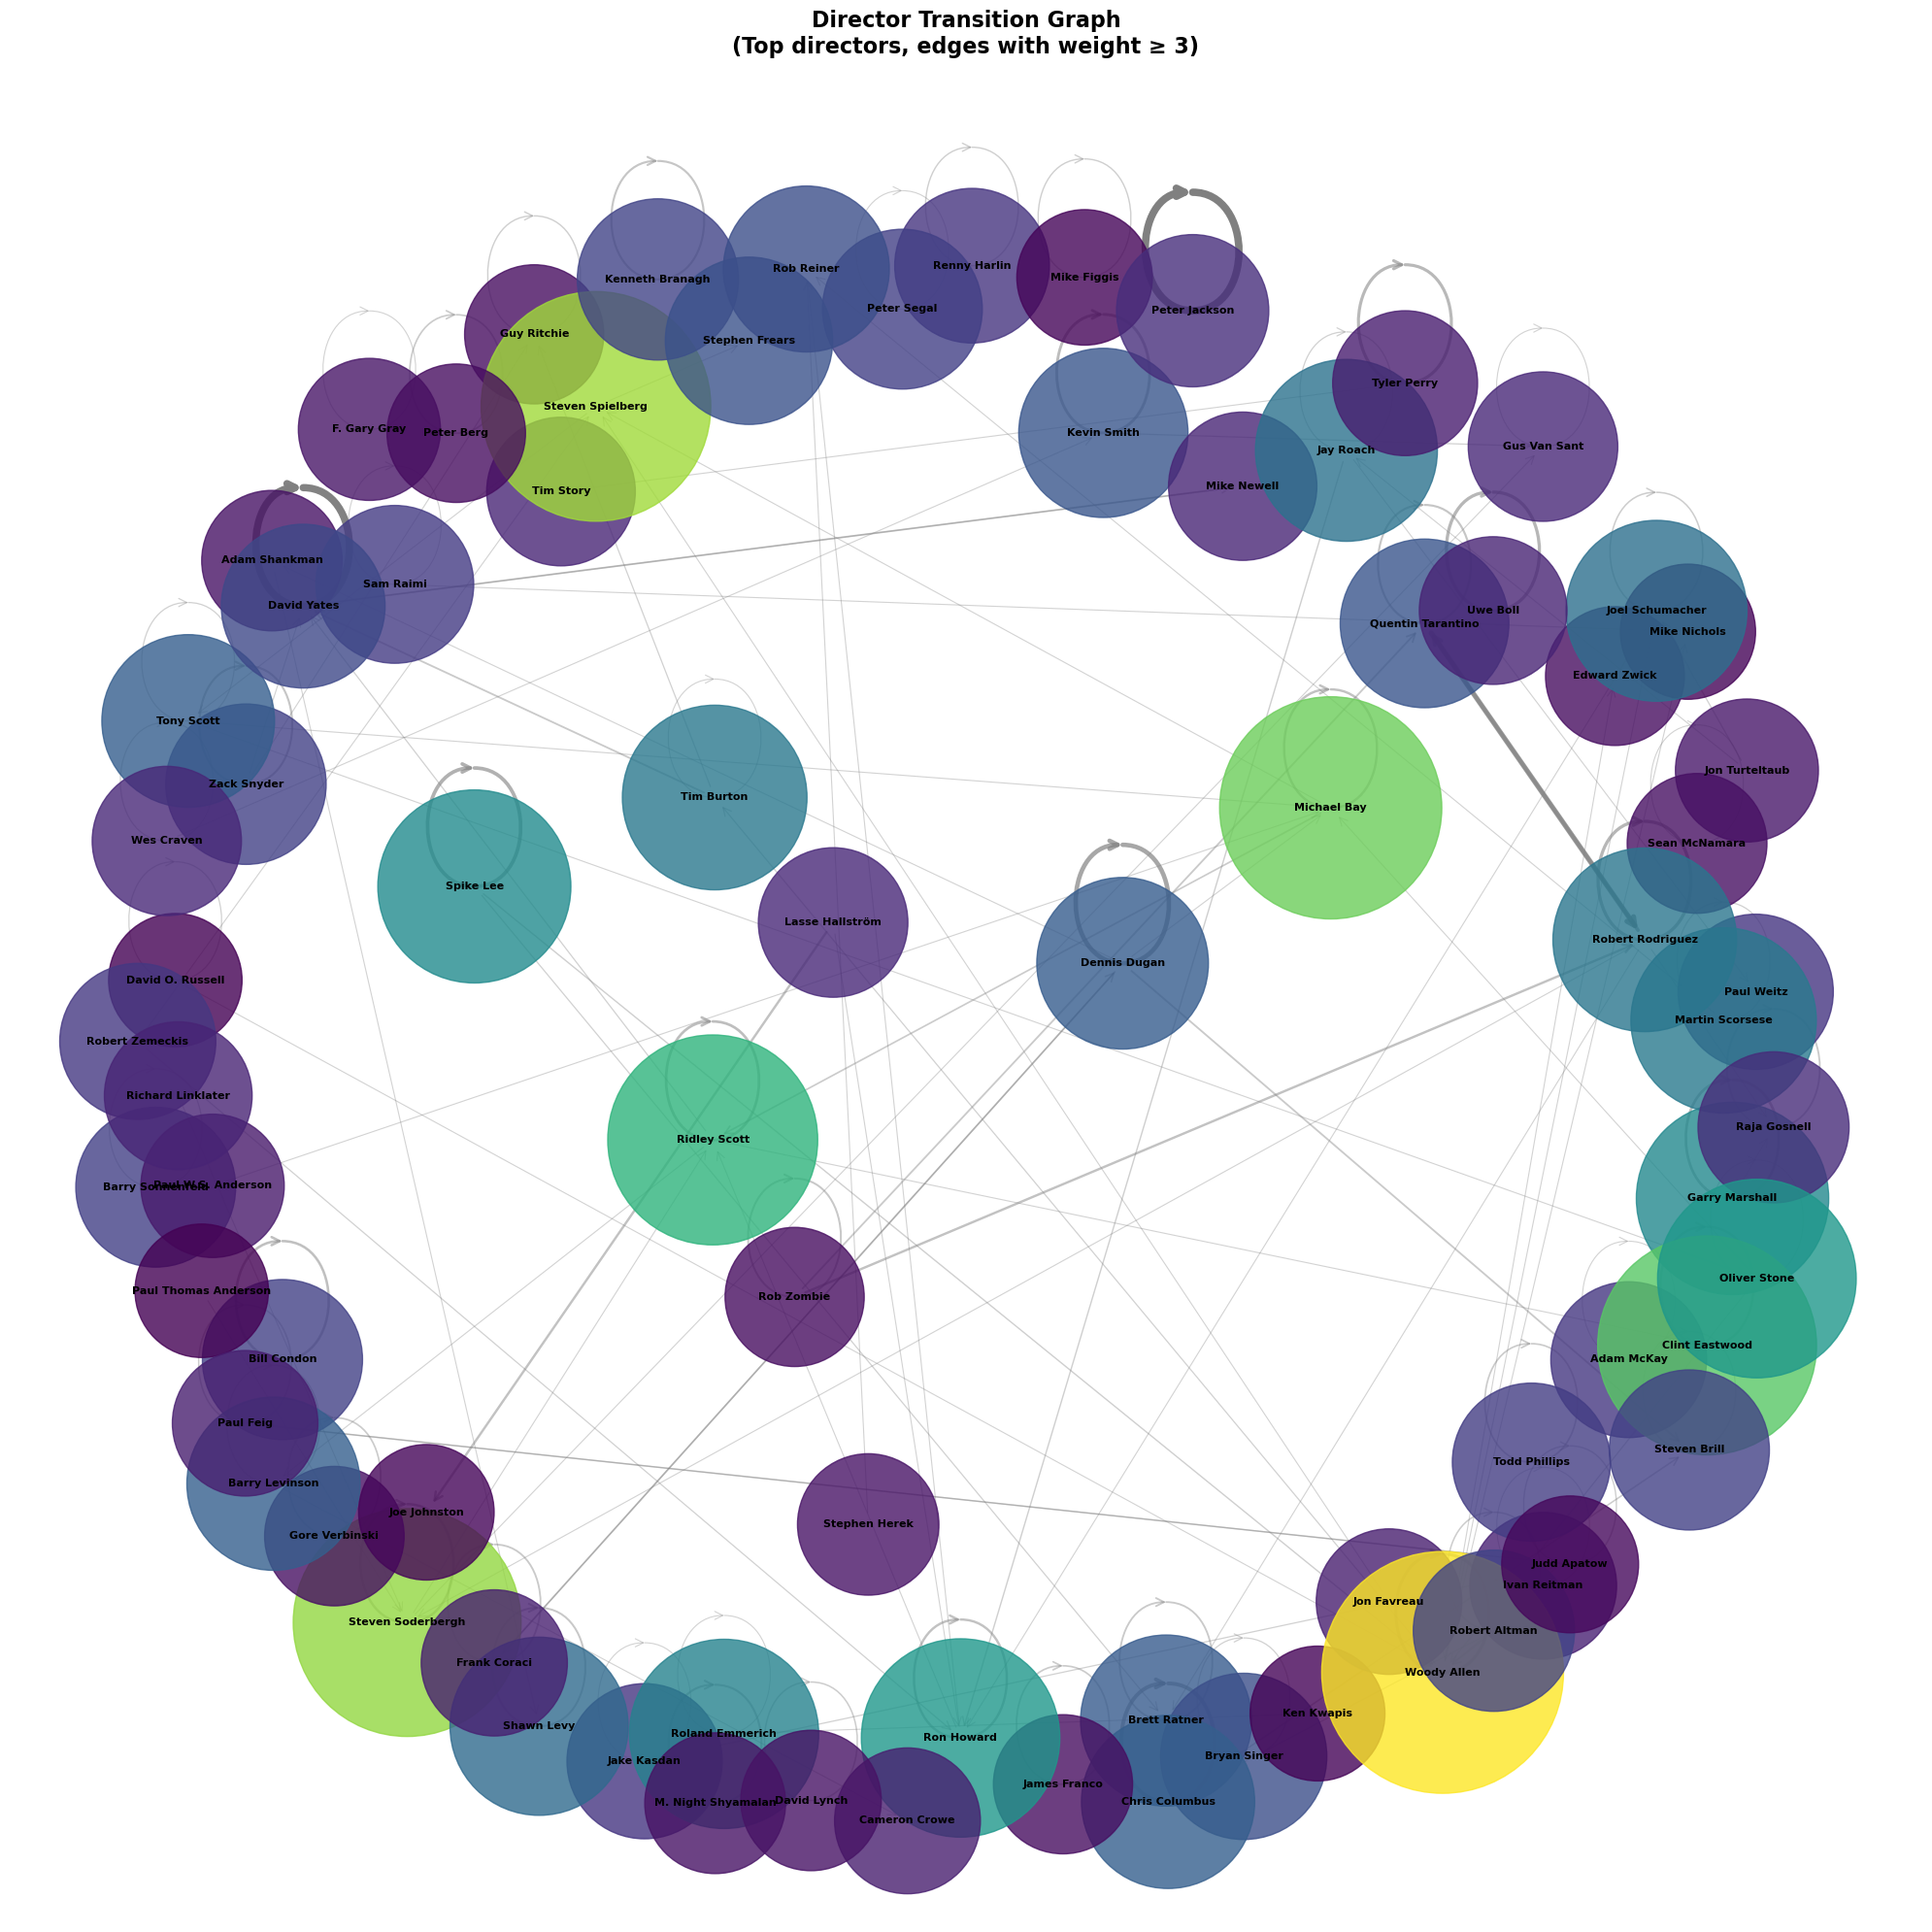


Graph saved as 'director_transition_graph.png'


In [10]:
import matplotlib.pyplot as plt
import networkx as nx

# Filter to most important nodes and edges for visualization
# Keep directors with high degree (connected to many other directors)
degree_dict = dict(director_graph.degree())
sorted_directors = sorted(degree_dict.items(), key=lambda x: x[1], reverse=True)

# Keep top directors by degree
top_n = 100
top_directors = [d[0] for d in sorted_directors[:top_n]]
subgraph = director_graph.subgraph(top_directors).copy()

# Further filter edges by weight (keep only significant transitions)
edges_to_remove = []
for u, v, data in subgraph.edges(data=True):
    if data['weight'] < 3:  # Only show transitions that happened 3+ times
        edges_to_remove.append((u, v))
subgraph.remove_edges_from(edges_to_remove)

# Remove isolated nodes after edge filtering
isolated = list(nx.isolates(subgraph))
subgraph.remove_nodes_from(isolated)

print(f"Filtered graph for visualization:")
print(f"  Nodes: {subgraph.number_of_nodes()}")
print(f"  Edges: {subgraph.number_of_edges()}")

# Create visualization
fig, ax = plt.subplots(figsize=(20, 20))

# Calculate layout
pos = nx.spring_layout(subgraph, k=2, iterations=50, seed=42)

# Get edge weights for sizing
edge_weights = [subgraph[u][v]['weight'] for u, v in subgraph.edges()]
max_weight = max(edge_weights) if edge_weights else 1

# Draw edges with width based on weight
for u, v, data in subgraph.edges(data=True):
    weight = data['weight']
    width = 0.5 + (weight / max_weight) * 5  # Scale edge width
    alpha = 0.3 + (weight / max_weight) * 0.7  # Scale transparency
    nx.draw_networkx_edges(subgraph, pos, [(u, v)], 
                           width=width, alpha=alpha,
                           edge_color='gray', arrows=True,
                           arrowsize=15, arrowstyle='->', ax=ax)

# Draw nodes sized by degree
node_sizes = [degree_dict[node] * 50 for node in subgraph.nodes()]
node_colors = [degree_dict[node] for node in subgraph.nodes()]

nx.draw_networkx_nodes(subgraph, pos, node_size=node_sizes,
                       node_color=node_colors, cmap='viridis',
                       alpha=0.8, ax=ax)

# Draw labels
nx.draw_networkx_labels(subgraph, pos, font_size=8, 
                        font_weight='bold', ax=ax)

plt.title("Director Transition Graph\n(Top directors, edges with weight ≥ 3)", 
          fontsize=16, fontweight='bold')
plt.axis('off')
plt.tight_layout()
plt.savefig('director_transition_graph.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"\nGraph saved as 'director_transition_graph.png'")

In [11]:
director_graph.has_node('Steven Spielberg')

True

In [40]:
degree_centrality = nx.degree_centrality(director_graph)
eigen_centrality = nx.eigenvector_centrality(director_graph)

The degrees with high centrality are the popular directors.

In [13]:
sorted(degree_centrality.items(), key=lambda item: item[1], reverse=True)[:10]

[('Woody Allen', 0.03756718859546623),
 ('Steven Spielberg', 0.033886422061229264),
 ('Steven Soderbergh', 0.03336059827062398),
 ('Michael Bay', 0.03172470203318532),
 ('Clint Eastwood', 0.03078990418322038),
 ('Ridley Scott', 0.028336059827062398),
 ('Oliver Stone', 0.025356391680299135),
 ('Ron Howard', 0.025297966814676328),
 ('Spike Lee', 0.02395419490535172),
 ('Garry Marshall', 0.023778920308483293)]

In [14]:
# Load director datasets
df_directors = pd.read_csv('../Datasets/directors.csv', index_col=0)
df_movies = pd.read_csv('../Datasets/movies.csv', index_col=0)

# Filter movies after 1990
df_movies = df_movies[df_movies['year'] > 1990]

# Merge movies with directors
df_merged = df_movies.merge(df_directors, left_on='director_id', right_on='id', suffixes=('_movie', '_director'))

# Calculate most popular directors by average popularity of their movies
director_popularity = df_merged.groupby('director_name').agg({
    'popularity': ['mean', 'sum', 'count'],
    'vote_average': 'mean',
    'revenue': 'sum'
}).round(2)

# Flatten column names
director_popularity.columns = ['avg_popularity', 'total_popularity', 'num_movies', 'avg_rating', 'total_revenue']

# Sort by average popularity
director_popularity = director_popularity.sort_values('avg_popularity', ascending=False)

print("Top 20 Most Popular Directors (movies after 1990):")
director_popularity.head(20)

Top 20 Most Popular Directors (movies after 1990):


,avg_popularity,total_popularity,num_movies,avg_rating,total_revenue
director_name,,,,,
Christopher Nolan,185.00,1480,8,7.80,4227483234
George Miller,124.75,499,4,6.02,982732274
Francis Lawrence,99.00,495,5,6.84,2952457182
James Cameron,97.25,389,4,7.30,5531881686
Gore Verbinski,95.43,668,7,6.53,3177013357
Peter Jackson,87.44,787,9,7.33,6498642820
David Fincher,75.50,755,10,7.34,2139346325
Quentin Tarantino,72.25,578,8,7.78,1501630797
Zack Snyder,71.86,503,7,6.49,2476197387


In [15]:
# We find the most popular directors
popularity_threshold = director_popularity['avg_popularity']    #.quantile(0.75)
popular_directors = set(director_popularity[director_popularity['avg_popularity'] >= popularity_threshold].index)


In [21]:
len(popular_directors)

198

Find the smallest X such that all top 50 popular directors are included within the top X nodes ranked by centrality.

In [17]:
# Get top 50 popular directors
TOP_N_POPULAR = 50

top_popular_directors = director_popularity.head(TOP_N_POPULAR).index.tolist()

print(f"Top {TOP_N_POPULAR} popular directors:")
for i, director in enumerate(top_popular_directors[:10], 1):
    pop = director_popularity.loc[director, 'avg_popularity']
    print(f"  {i:2d}. {director:30s} - Popularity: {pop:.2f}")
print(f"  ... and {TOP_N_POPULAR - 10} more")

Top 50 popular directors:
   1. Christopher Nolan              - Popularity: 185.00
   2. George Miller                  - Popularity: 124.75
   3. Francis Lawrence               - Popularity: 99.00
   4. James Cameron                  - Popularity: 97.25
   5. Gore Verbinski                 - Popularity: 95.43
   6. Peter Jackson                  - Popularity: 87.44
   7. David Fincher                  - Popularity: 75.50
   8. Quentin Tarantino              - Popularity: 72.25
   9. Zack Snyder                    - Popularity: 71.86
  10. Luc Besson                     - Popularity: 68.00
  ... and 40 more


In [18]:
sorted_nodes = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)

In [19]:
sorted_nodes

[('Woody Allen', 0.03756718859546623),
 ('Steven Spielberg', 0.033886422061229264),
 ('Steven Soderbergh', 0.03336059827062398),
 ('Michael Bay', 0.03172470203318532),
 ('Clint Eastwood', 0.03078990418322038),
 ('Ridley Scott', 0.028336059827062398),
 ('Oliver Stone', 0.025356391680299135),
 ('Ron Howard', 0.025297966814676328),
 ('Spike Lee', 0.02395419490535172),
 ('Garry Marshall', 0.023778920308483293),
 ('Roland Emmerich', 0.023019397055386772),
 ('Martin Scorsese', 0.02208459920542183),
 ('Tim Burton', 0.021909324608553403),
 ('Robert Rodriguez', 0.021675625146062166),
 ('Jay Roach', 0.0212666510867025),
 ('Joel Schumacher', 0.021032951624211264),
 ('Shawn Levy', 0.020390278102360365),
 ('Christopher Nolan', 0.019806029446132276),
 ('Barry Levinson', 0.019280205655526992),
 ('Chris Columbus', 0.019280205655526992),
 ('Tony Scott', 0.019163355924281374),
 ('J.J. Abrams', 0.018988081327412948),
 ('Dennis Dugan', 0.01892965646179014),
 ('Brett Ratner', 0.018812806730544522),
 ('Kevi

In [22]:
node_to_rank = {node: rank + 1 for rank, (node, _) in enumerate(sorted_nodes)}

In [23]:
node_to_rank

{'Woody Allen': 1,
 'Steven Spielberg': 2,
 'Steven Soderbergh': 3,
 'Michael Bay': 4,
 'Clint Eastwood': 5,
 'Ridley Scott': 6,
 'Oliver Stone': 7,
 'Ron Howard': 8,
 'Spike Lee': 9,
 'Garry Marshall': 10,
 'Roland Emmerich': 11,
 'Martin Scorsese': 12,
 'Tim Burton': 13,
 'Robert Rodriguez': 14,
 'Jay Roach': 15,
 'Joel Schumacher': 16,
 'Shawn Levy': 17,
 'Christopher Nolan': 18,
 'Barry Levinson': 19,
 'Chris Columbus': 20,
 'Tony Scott': 21,
 'J.J. Abrams': 22,
 'Dennis Dugan': 23,
 'Brett Ratner': 24,
 'Kevin Smith': 25,
 'Quentin Tarantino': 26,
 'Stephen Frears': 27,
 'Bryan Singer': 28,
 'Rob Reiner': 29,
 'David Yates': 30,
 'David Fincher': 31,
 'Antoine Fuqua': 32,
 'Kenneth Branagh': 33,
 'Robert Altman': 34,
 'Zack Snyder': 35,
 'Steven Brill': 36,
 'Bill Condon': 37,
 'Peter Segal': 38,
 'Barry Sonnenfeld': 39,
 'Michael Winterbottom': 40,
 'Todd Phillips': 41,
 'Sam Raimi': 42,
 'Robert Zemeckis': 43,
 'Adam McKay': 44,
 'Jake Kasdan': 45,
 'Paul Weitz': 46,
 'Renny Har

In [24]:
#popular_directors.remove("Michael Moore")
popular_directors.remove("Jean-Pierre Jeunet")


In [41]:
from Director_Director_Graph.director_graph_functions import calculate_popular_directors_in_degree_centrality

# Find minimum X for each centrality measure
centrality_measures = {
    'Degree Centrality': degree_centrality,
    'Eigenvector Centrality': eigen_centrality
}

results = {}
for measure_name, centrality_dict in centrality_measures.items():
    print(f"\nAnalyzing {measure_name}...")
    result = calculate_popular_directors_in_degree_centrality(centrality_dict, popular_directors)
    results[measure_name] = result
    
    print(f"  Minimum X = {result['min_X']}")
    if result['worst_ranked_director']:
        print(f"  Worst ranked popular director: {result['worst_ranked_director'][0]} (rank {result['worst_ranked_director'][1]})")
    if result['directors_not_in_graph']:
        print(f"  Note: {len(result['directors_not_in_graph'])} popular directors not in graph: {', '.join(result['directors_not_in_graph'])}")


Analyzing Degree Centrality...
  Minimum X = 3534
  Worst ranked popular director: Michael Moore (rank 3534)
  Note: 2 popular directors not in graph: Zhang Yimou, Alejandro González Iñárritu

Analyzing Eigenvector Centrality...
  Minimum X = 8325
  Worst ranked popular director: Lilly Wachowski (rank 8325)
  Note: 2 popular directors not in graph: Zhang Yimou, Alejandro González Iñárritu


In [42]:
results["worst_ranked_director"]

KeyError: 'worst_ranked_director'

In [43]:
director_graph.degree('Michael Moore')

19

In [44]:
# Calculate eigenvector centrality for comparison with degree centrality
print("Calculating eigenvector centrality...")
eigen_centrality = nx.eigenvector_centrality(director_graph, max_iter=1000)
print("Done!")

Calculating eigenvector centrality...
Done!


In [46]:
import matplotlib.pyplot as plt
import numpy as np


# Alternative: If you want to keep the original structure closer:
def create_scatter_plot_simple(results, TOP_N_POPULAR):
    """Simplified version closer to original code with fixes"""

    # Create figure - handle variable number of measures
    n_measures = len(results)
    if n_measures == 0:
        print("No results to plot")
        return

    fig, axes = plt.subplots(1, min(n_measures, 2), figsize=(16, 6))

    # Ensure axes is always a list
    if n_measures == 1:
        axes = [axes]

    colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'][:n_measures]

    for idx, (measure_name, result) in enumerate(list(results.items())[:2]):  # Limit to 2 as per original
        ax = axes[idx]

        # Safe data extraction
        popular_director_ranks = result.get('popular_director_ranks', [])
        if popular_director_ranks:
            ranks = [rank for _, rank, _ in popular_director_ranks]
            pop_rank = list(range(1, len(ranks) + 1))
        else:
            ranks = []
            pop_rank = []

        # Scatter plot only if we have data
        if ranks:
            ax.scatter(pop_rank, ranks, alpha=0.6, s=100, color=colors[idx],
                      edgecolors='black', linewidth=0.5)

        # Add horizontal line at min_X
        min_X = result.get('min_X', 0)
        ax.axhline(y=min_X, color='red', linestyle='--', linewidth=2,
                  label=f'Min X = {min_X}', alpha=0.7)

        # Add diagonal line for perfect correlation
        ax.plot([1, TOP_N_POPULAR], [1, TOP_N_POPULAR], 'k--', alpha=0.3, linewidth=1,
                label='Perfect correlation')

        ax.set_xlabel('Popularity Rank', fontsize=11, fontweight='bold')
        ax.set_ylabel(f'{measure_name} Rank', fontsize=11, fontweight='bold')
        ax.set_title(f'{measure_name}\n(Min X = {min_X})',
                    fontsize=12, fontweight='bold')
        ax.legend(loc='upper left', fontsize=9)
        ax.grid(True, alpha=0.3)

        ax.set_xlim(0, TOP_N_POPULAR + 5)
        ax.set_ylim(0, max(min_X + 50, TOP_N_POPULAR + 50))

    plt.suptitle('Popularity Rank vs Centrality Rank Comparison',
                fontsize=16, fontweight='bold', y=1.02)
    plt.tight_layout()

    # Create directory if it doesn't exist
    import os
    os.makedirs('Director_Director_Graph', exist_ok=True)

    plt.savefig('Director_Director_Graph/minimum_coverage_scatter.png', dpi=300, bbox_inches='tight')
    plt.show()

    print("Saved: Director_Director_Graph/minimum_coverage_scatter.png")

    return fig, axes

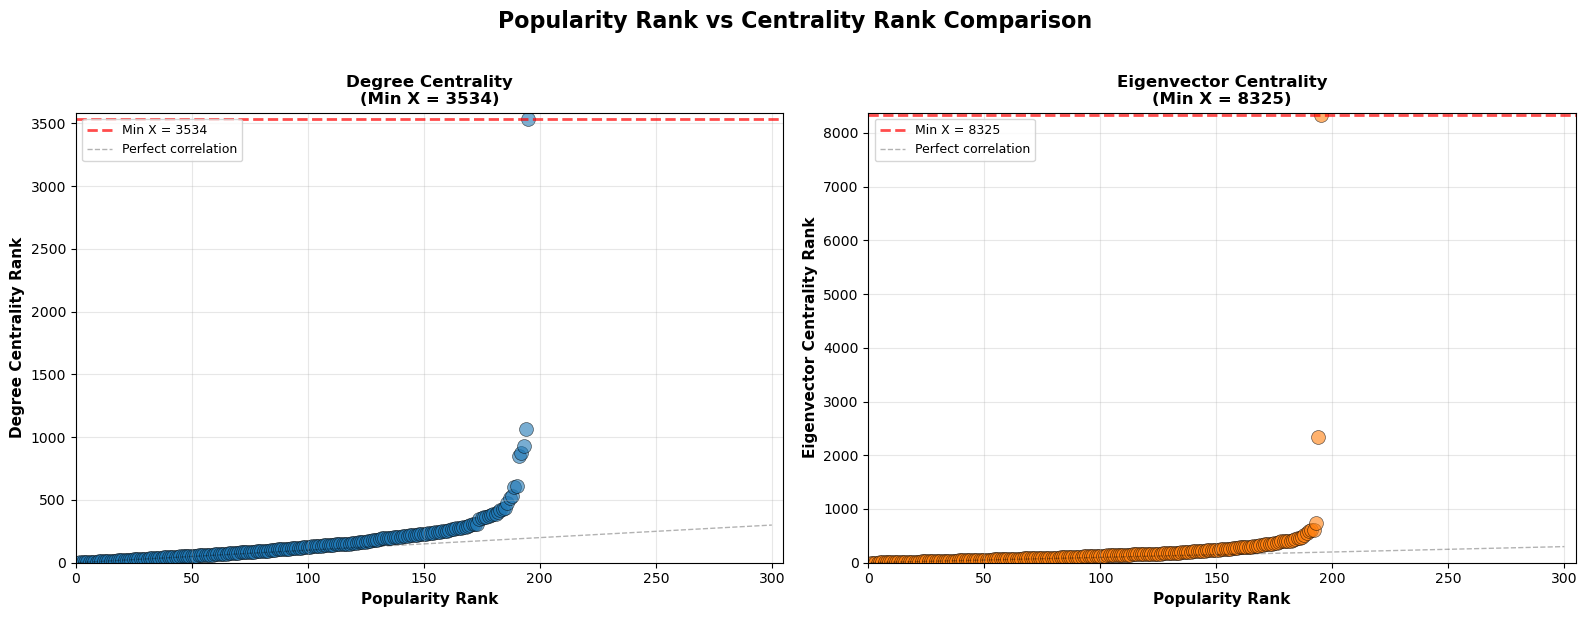

Saved: Director_Director_Graph/minimum_coverage_scatter.png


(<Figure size 1600x600 with 2 Axes>,
 array([<Axes: title={'center': 'Degree Centrality\n(Min X = 3534)'}, xlabel='Popularity Rank', ylabel='Degree Centrality Rank'>,
        <Axes: title={'center': 'Eigenvector Centrality\n(Min X = 8325)'}, xlabel='Popularity Rank', ylabel='Eigenvector Centrality Rank'>],
       dtype=object))

In [53]:
create_scatter_plot_simple(results, 300)

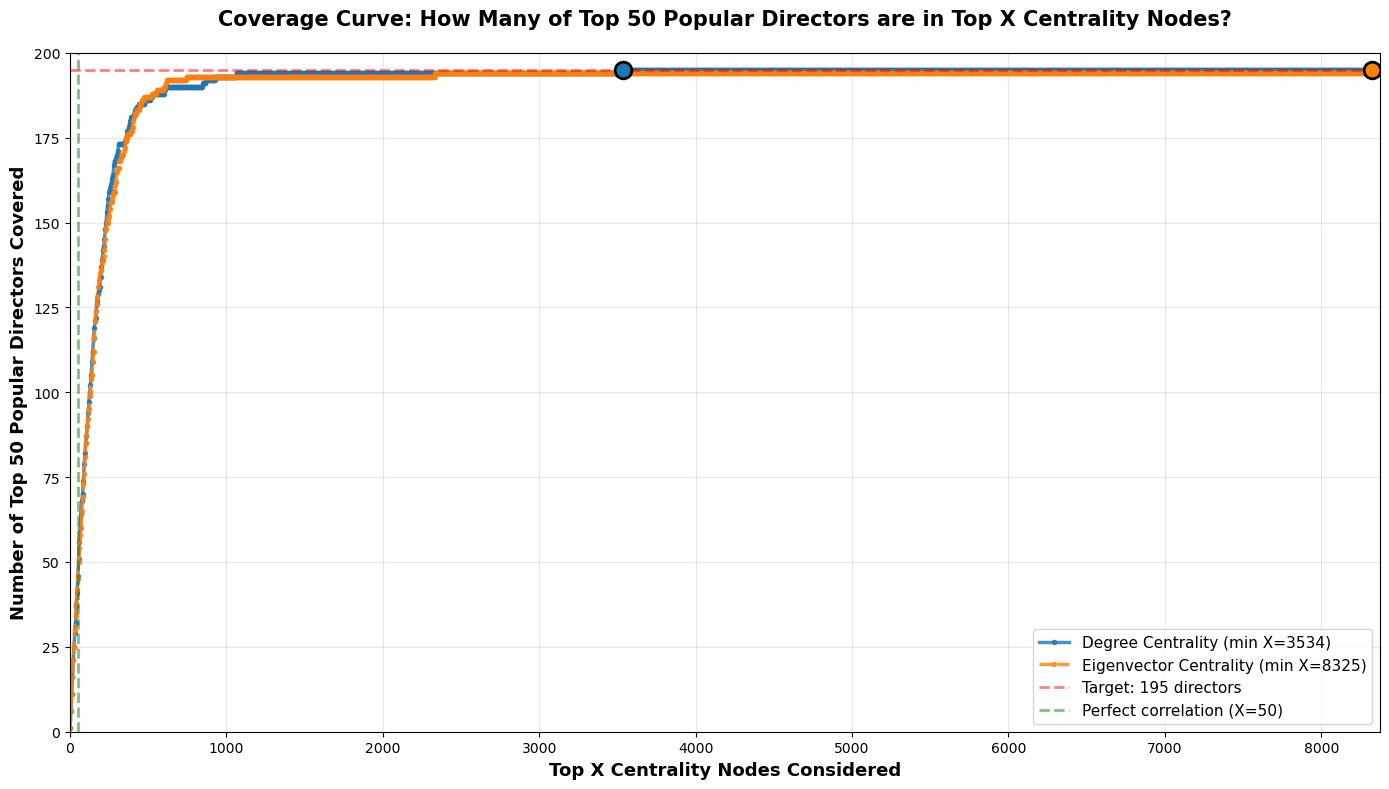

Saved: Director_Director_Graph/minimum_coverage_curve.png


In [54]:
# Coverage curve: How many popular directors are covered by top X?
fig, ax = plt.subplots(figsize=(14, 8))

colors = ['#1f77b4', '#ff7f0e']
linestyles = ['-', '--']

max_X = max([results[m]['min_X'] for m in results.keys()])
X_values = list(range(1, max_X + 50, 5))  # Sample every 5 ranks

for idx, (measure_name, result) in enumerate(results.items()):
    popular_director_ranks = result['popular_director_ranks']
    ranks = [rank for _, rank, _ in popular_director_ranks]
    
    coverage = []
    for X in X_values:
        num_covered = sum(1 for rank in ranks if rank <= X)
        coverage.append(num_covered)
    
    ax.plot(X_values, coverage, label=f'{measure_name} (min X={result["min_X"]})',
            color=colors[idx], linestyle=linestyles[idx], linewidth=2.5, marker='o', 
            markersize=3, alpha=0.8)
    
    # Mark the point where coverage reaches TOP_N_POPULAR (minus directors not in graph)
    min_X = result['min_X']
    covered_count = len(popular_director_ranks)
    ax.plot(min_X, covered_count, 'o', color=colors[idx], markersize=12, 
            markeredgecolor='black', markeredgewidth=2, zorder=5)

# Add horizontal line at TOP_N_POPULAR
max_covered = max(len(results[m]['popular_director_ranks']) for m in results.keys())
ax.axhline(y=max_covered, color='red', linestyle='--', linewidth=2, 
           label=f'Target: {max_covered} directors', alpha=0.5)

# Add vertical line at x=TOP_N_POPULAR (perfect correlation)
ax.axvline(x=TOP_N_POPULAR, color='green', linestyle='--', linewidth=2, 
           label=f'Perfect correlation (X={TOP_N_POPULAR})', alpha=0.5)

ax.set_xlabel('Top X Centrality Nodes Considered', fontsize=13, fontweight='bold')
ax.set_ylabel(f'Number of Top {TOP_N_POPULAR} Popular Directors Covered', fontsize=13, fontweight='bold')
ax.set_title(f'Coverage Curve: How Many of Top {TOP_N_POPULAR} Popular Directors are in Top X Centrality Nodes?', 
             fontsize=15, fontweight='bold', pad=20)
ax.legend(fontsize=11, loc='lower right')
ax.grid(True, alpha=0.3)
ax.set_xlim(0, max_X + 50)
ax.set_ylim(0, max_covered + 5)

plt.tight_layout()
plt.savefig('Director_Director_Graph/minimum_coverage_curve.png', dpi=300, bbox_inches='tight')
plt.show()

print("Saved: Director_Director_Graph/minimum_coverage_curve.png")

In [55]:
# Create summary table comparing all centrality measures
summary_data = []
for measure_name, result in results.items():
    min_X = result['min_X']
    worst_director = result['worst_ranked_director']
    expansion_ratio = min_X / TOP_N_POPULAR
    num_covered = len(result['popular_director_ranks'])
    
    summary_data.append({
        'Centrality Measure': measure_name,
        'Minimum X': min_X,
        'Expansion Ratio': f"{expansion_ratio:.2f}x",
        'Directors Covered': f"{num_covered}/{TOP_N_POPULAR}",
        'Worst Ranked Director': worst_director[0] if worst_director else 'N/A',
        'Worst Rank': worst_director[1] if worst_director else 'N/A'
    })

df_summary = pd.DataFrame(summary_data)
print("\n" + "="*100)
print("SUMMARY: Centrality Measures Comparison")
print("="*100)
print(df_summary.to_string(index=False))
print("\n" + "="*100)


SUMMARY: Centrality Measures Comparison
    Centrality Measure  Minimum X Expansion Ratio Directors Covered Worst Ranked Director  Worst Rank
     Degree Centrality       3534          70.68x            195/50         Michael Moore        3534
Eigenvector Centrality       8325         166.50x            195/50       Lilly Wachowski        8325



In [56]:
len(popular_directors)

197

Analyze how actors transition between working with popular and non-popular directors from the start to the end of their careers.

In [57]:
# Define popularity threshold
# Use directors with above-average popularity as "popular"

In [58]:
# Analyze actor career transitions
# For each actor, find their first and last directors and classify the transition

def get_career_classification(all_directors, popular_directors, n_films=3):
    if len(directors_list) == 0:
        return None, None

    first_films = directors_list[:min(n_films, len(directors_list))]
    last_films = directors_list[-min(n_films, len(directors_list)):]
    
    # Count popular directors in first and last films
    first_popular = sum(1 for d in first_films if d['director'] in popular_directors)
    last_popular = sum(1 for d in last_films if d['director'] in popular_directors)
    
    # Classify based on majority
    start_class = "Popular" if first_popular > len(first_films) / 2 else "Non-Popular"
    end_class = "Popular" if last_popular > len(last_films) / 2 else "Non-Popular"
    
    return start_class, end_class

# Analyze all actors
transitions = {
    ('Non-Popular', 'Non-Popular'): 0,
    ('Non-Popular', 'Popular'): 0,
    ('Popular', 'Non-Popular'): 0,
    ('Popular', 'Popular'): 0
}

actor_min_films = 3  # Only consider actors with at least 5 films

for actor, directors_list in actor_directors_dict.items():
    if len(directors_list) >= actor_min_films:
        start_class, end_class = get_career_classification(directors_list, popular_directors, n_films=3)
        
        if start_class and end_class:
            transitions[(start_class, end_class)] += 1

print(f"Actor Career Transitions (actors with >= {actor_min_films} films):")

total_actors = sum(transitions.values())
for (start, end), count in sorted(transitions.items()):
    percentage = (count / total_actors * 100) if total_actors > 0 else 0
    print(f"{start:15s} → {end:15s}: {count:5d} actors ({percentage:5.1f}%)")

print(f"\\nTotal actors analyzed: {total_actors}")

Actor Career Transitions (actors with >= 3 films):
Non-Popular     → Non-Popular    :  7074 actors ( 86.6%)
Non-Popular     → Popular        :   219 actors (  2.7%)
Popular         → Non-Popular    :   759 actors (  9.3%)
Popular         → Popular        :   120 actors (  1.5%)
\nTotal actors analyzed: 8172


In [59]:
# Create Sankey diagram showing actor career transitions
import plotly.graph_objects as go

# Define nodes
# 0: Career Start - Non-Popular
# 1: Career Start - Popular  
# 2: Career End - Non-Popular
# 3: Career End - Popular

nodes = [
    "Career Start:<br>Non-Popular Directors",
    "Career Start:<br>Popular Directors",
    "Career End:<br>Non-Popular Directors",
    "Career End:<br>Popular Directors"
]

# Define links (source, target, value)
links = [
    # Non-Popular → Non-Popular
    (0, 2, transitions[('Non-Popular', 'Non-Popular')]),
    # Non-Popular → Popular
    (0, 3, transitions[('Non-Popular', 'Popular')]),
    # Popular → Non-Popular
    (1, 2, transitions[('Popular', 'Non-Popular')]),
    # Popular → Popular
    (1, 3, transitions[('Popular', 'Popular')])
]

# Prepare data for Sankey
source_indices = [link[0] for link in links]
target_indices = [link[1] for link in links]
values = [link[2] for link in links]

# Create colors for the flows
colors = [
    'rgba(200, 200, 200, 0.4)',  # Non-Popular → Non-Popular (gray)
    'rgba(100, 200, 100, 0.6)',  # Non-Popular → Popular (green - upward)
    'rgba(200, 100, 100, 0.6)',  # Popular → Non-Popular (red - downward)
    'rgba(100, 100, 200, 0.6)'   # Popular → Popular (blue - stable)
]

# Node colors
node_colors = [
    'rgba(200, 200, 200, 0.8)',  # Career Start Non-Popular
    'rgba(100, 150, 255, 0.8)',  # Career Start Popular
    'rgba(200, 200, 200, 0.8)',  # Career End Non-Popular
    'rgba(100, 150, 255, 0.8)'   # Career End Popular
]

# Create Sankey diagram
fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=30,
        thickness=30,
        line=dict(color="black", width=2),
        label=nodes,
        color=node_colors,
        x=[0.1, 0.1, 0.9, 0.9],  # Position nodes
        y=[0.2, 0.8, 0.2, 0.8]
    ),
    link=dict(
        source=source_indices,
        target=target_indices,
        value=values,
        color=colors,
        label=[f"{v} actors" for v in values]
    )
)])

fig.update_layout(
    title={
        'text': f"Actor Career Transitions: Popular vs Non-Popular Directors<br>" +
                f"<sub>Based on {total_actors} actors with ≥{actor_min_films} films (first 3 vs last 3 films)</sub>",
        'x': 0.5,
        'xanchor': 'center',
        'font': {'size': 18, 'color': 'black'}
    },
    font=dict(size=12),
    height=600,
    width=1000
)

fig.show()
fig.write_html('actor_career_transitions_sankey.html')
print("\\nSaved: actor_career_transitions_sankey.html")

\nSaved: actor_career_transitions_sankey.html


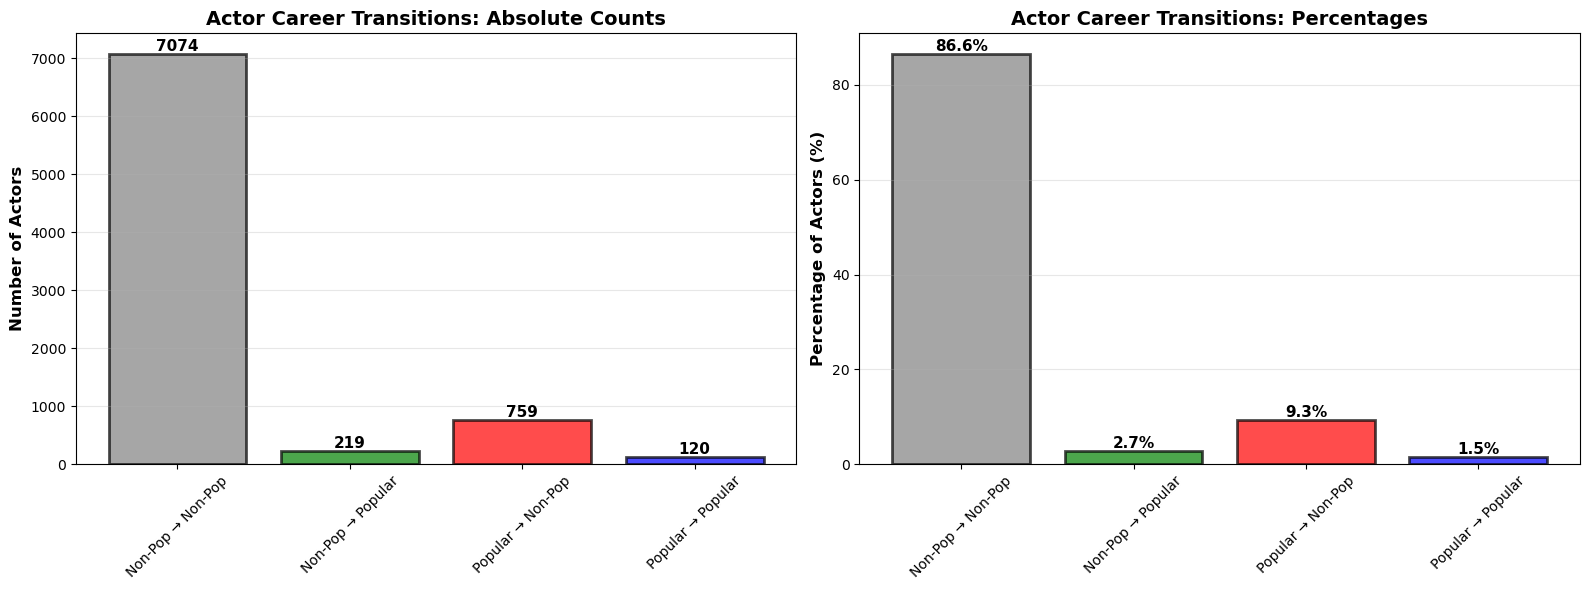

Saved: actor_career_transitions_bars.png


In [60]:
# Create bar chart showing transition patterns
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Prepare data for grouped bar chart
transition_labels = ['Non-Pop → Non-Pop', 'Non-Pop → Popular', 'Popular → Non-Pop', 'Popular → Popular']
transition_counts = [
    transitions[('Non-Popular', 'Non-Popular')],
    transitions[('Non-Popular', 'Popular')],
    transitions[('Popular', 'Non-Popular')],
    transitions[('Popular', 'Popular')]
]
transition_colors = ['gray', 'green', 'red', 'blue']

# Bar chart 1: Absolute counts
bars1 = ax1.bar(transition_labels, transition_counts, color=transition_colors, alpha=0.7, edgecolor='black', linewidth=2)
ax1.set_ylabel('Number of Actors', fontsize=12, fontweight='bold')
ax1.set_title('Actor Career Transitions: Absolute Counts', fontsize=14, fontweight='bold')
ax1.grid(axis='y', alpha=0.3)

# Add value labels on bars
for bar in bars1:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height,
            f'{int(height)}',
            ha='center', va='bottom', fontsize=11, fontweight='bold')

# Rotate x labels for better readability
ax1.tick_params(axis='x', rotation=45)

# Bar chart 2: Percentages
transition_percentages = [(count / total_actors * 100) for count in transition_counts]
bars2 = ax2.bar(transition_labels, transition_percentages, color=transition_colors, alpha=0.7, edgecolor='black', linewidth=2)
ax2.set_ylabel('Percentage of Actors (%)', fontsize=12, fontweight='bold')
ax2.set_title('Actor Career Transitions: Percentages', fontsize=14, fontweight='bold')
ax2.grid(axis='y', alpha=0.3)

# Add value labels on bars
for bar in bars2:
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height,
            f'{height:.1f}%',
            ha='center', va='bottom', fontsize=11, fontweight='bold')

# Rotate x labels
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.savefig('actor_career_transitions_bars.png', dpi=300, bbox_inches='tight')
plt.show()

print("Saved: actor_career_transitions_bars.png")

In [61]:
 # Detailed statistics and insights
print(f"\\n{'='*100}")
print("DETAILED ANALYSIS: Actor Career Transitions")
print(f"{'='*100}\\n")

# Calculate key metrics
started_nonpopular = transitions[('Non-Popular', 'Non-Popular')] + transitions[('Non-Popular', 'Popular')]
started_popular = transitions[('Popular', 'Non-Popular')] + transitions[('Popular', 'Popular')]

ended_nonpopular = transitions[('Non-Popular', 'Non-Popular')] + transitions[('Popular', 'Non-Popular')]
ended_popular = transitions[('Non-Popular', 'Popular')] + transitions[('Popular', 'Popular')]

upward_mobility = transitions[('Non-Popular', 'Popular')]
downward_mobility = transitions[('Popular', 'Non-Popular')]
stable_popular = transitions[('Popular', 'Popular')]
stable_nonpopular = transitions[('Non-Popular', 'Non-Popular')]

print("CAREER START:")
print(f"  Actors who started with non-popular directors: {started_nonpopular:5d} ({started_nonpopular/total_actors*100:5.1f}%)")
print(f"  Actors who started with popular directors:     {started_popular:5d} ({started_popular/total_actors*100:5.1f}%)")

print("\\nCAREER END:")
print(f"  Actors who ended with non-popular directors:   {ended_nonpopular:5d} ({ended_nonpopular/total_actors*100:5.1f}%)")
print(f"  Actors who ended with popular directors:       {ended_popular:5d} ({ended_popular/total_actors*100:5.1f}%)")

print("\\nMOBILITY PATTERNS:")
print(f"  Upward mobility (Non-Pop → Popular):           {upward_mobility:5d} ({upward_mobility/total_actors*100:5.1f}%)")
print(f"  Downward mobility (Popular → Non-Pop):         {downward_mobility:5d} ({downward_mobility/total_actors*100:5.1f}%)")
print(f"  Stable at popular level:                       {stable_popular:5d} ({stable_popular/total_actors*100:5.1f}%)")
print(f"  Stable at non-popular level:                   {stable_nonpopular:5d} ({stable_nonpopular/total_actors*100:5.1f}%)")

print("\\nCONDITIONAL PROBABILITIES:")
if started_nonpopular > 0:
    prob_move_up = upward_mobility / started_nonpopular * 100
    print(f"  P(end with popular | start with non-popular) = {prob_move_up:.1f}%")

if started_popular > 0:
    prob_move_down = downward_mobility / started_popular * 100
    prob_stay_popular = stable_popular / started_popular * 100
    print(f"  P(end with popular | start with popular)     = {prob_stay_popular:.1f}%")
    print(f"  P(end with non-popular | start with popular) = {prob_move_down:.1f}%")

print("\\nKEY INSIGHTS:")
print(f"  • Net upward mobility: {upward_mobility - downward_mobility:+d} actors")
if upward_mobility > downward_mobility:
    print(f"    → More actors moved UP to popular directors than moved DOWN")
elif downward_mobility > upward_mobility:
    print(f"    → More actors moved DOWN from popular directors than moved UP")
else:
    print(f"    → Equal upward and downward mobility")

print(f"\\n  • {stable_popular + stable_nonpopular} actors ({(stable_popular + stable_nonpopular)/total_actors*100:.1f}%) stayed at the same level")
print(f"  • {upward_mobility + downward_mobility} actors ({(upward_mobility + downward_mobility)/total_actors*100:.1f}%) changed levels")

\n====================================================================================================
DETAILED ANALYSIS: Actor Career Transitions
====================================================================================================\n
CAREER START:
  Actors who started with non-popular directors:  7293 ( 89.2%)
  Actors who started with popular directors:       879 ( 10.8%)
\nCAREER END:
  Actors who ended with non-popular directors:    7833 ( 95.9%)
  Actors who ended with popular directors:         339 (  4.1%)
\nMOBILITY PATTERNS:
  Upward mobility (Non-Pop → Popular):             219 (  2.7%)
  Downward mobility (Popular → Non-Pop):           759 (  9.3%)
  Stable at popular level:                         120 (  1.5%)
  Stable at non-popular level:                    7074 ( 86.6%)
\nCONDITIONAL PROBABILITIES:
  P(end with popular | start with non-popular) = 3.0%
  P(end with popular | start with popular)     = 13.7%
  P(end with non-popular | start with popular) = 86